In [77]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../")

# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn
from src import soporte_outliers as so
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC


# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# leemos los data dataframe 
df_em = pd.read_csv("../datos/employee_survey_data.csv", index_col = 0).reset_index(drop=True)
df_data = pd.read_csv("../datos/general_data.csv", index_col = 0).reset_index()
df_manag = pd.read_csv("../datos/manager_survey_data.csv", index_col = 0).reset_index(drop=True)


In [12]:
# Concatenar lateralmente
df_final = pd.concat([df_em, df_data, df_manag], axis=1)
df_final.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,11,8,0,1.0,6,1,0,0,3,3
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,8,1,6.0,3,5,1,4,2,4
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,15,8,3,5.0,2,5,0,3,3,3
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,11,8,3,13.0,5,8,7,5,2,3
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,12,8,2,9.0,2,6,0,4,3,3


In [13]:
# llamamos a la función para hacer el análisis exploratorio de datos, para familiarizarnos con la estructura de los datos
sl.exploracion_datos(df_final)

El número de filas es 4410 y el número de columnas es 29

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  EmployeeID               4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel      

None

In [14]:
df_final.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [15]:
df_final.drop(columns=['EmployeeCount','Over18','EmployeeID','StandardHours',],inplace=True)

## Razones para el dropeo:

**NúmeroDeEmpleados**---> Solo hay valores 1, un solo empleado.

**Over18**--> Solo tenemos valor YES.

**EmployeeID**--> Es un valor unico para cada empleado.

**HorasEstándar** --> Solo hay valores 1, 8 horas  .


In [27]:
# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
gestionar_nulos = sn.GestionNulos(df_final)
nulos = gestionar_nulos.calcular_porcentaje_nulos()
nulos

EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64

In [ ]:
gestionar_nulos.mostrar_distribucion_categoricas()

In [30]:
columnas_desconocido = df_final.select_dtypes(include=['object']).columns             # Vamos a reemplazar categoricas por  valor desconocido
columnas_moda = []            # Vamos a reemplazar categoricas por  valor desconocido

In [37]:
df_final = gestionar_nulos.imputar_nulos_categoricas(columnas_moda, columnas_desconocido)
df_final.head(2)    #Imputamos nulos en la variables categoricas

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0


In [36]:
# llamamos al método para imputar valores nulos con el método KNN con 5 vecinos mas cercanos para las numericas
gestionar_nulos.imputar_knn(nulos.index)
# mostramos los resultados
df_final.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0


In [38]:
#borramos las columnas originales y nos quedamos con las columas nuevas ya imputadas

df_final = df_final.drop(columns=['EnvironmentSatisfaction','JobSatisfaction','NumCompaniesWorked','TotalWorkingYears','WorkLifeBalance'])
df_final.head(2)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0


In [ ]:
# Vamos a ver los valores duplicados
df_final.duplicated().sum()

np.int64(0)

In [43]:
# Eliminamos los duplicados
df_final = df_final.drop_duplicates()

In [46]:
#comprobamos los valores unicos de las columnas que consideramos categoricas
df_final['EnvironmentSatisfaction_knn'].unique()
print(df_final['EnvironmentSatisfaction_knn'].unique())
df_final['JobSatisfaction_knn'].unique()
print(df_final['JobSatisfaction_knn'].unique())
df_final['PerformanceRating'].unique()
print(df_final['PerformanceRating'].unique())
df_final['Education'].unique()
print(df_final['Education'].unique())
df_final['JobLevel'].unique()
print(df_final['JobLevel'].unique())
df_final['TrainingTimesLastYear'].unique()
print(df_final['TrainingTimesLastYear'].unique())
df_final['JobInvolvement'].unique()
print(df_final['JobInvolvement'].unique())

[3.  2.  4.  1.  2.4 1.8 3.2 2.8 3.4 2.6 3.6 2.2 1.6]
[4.  2.  1.  3.  2.8 1.4 2.6 2.4 3.2 1.8 3.4 3.8 2.2 3.6]
[3 4]
[2 1 4 5 3]
[1 4 3 2 5]
[6 3 2 5 4 0 1]
[3 2 1 4]


In [48]:
#Vamos a cambiar a object las columnas que consideramos que realmente  son categorias aunque son numeros
#para las visualizaciones.
df_final['EnvironmentSatisfaction_knn'] = df_final['EnvironmentSatisfaction_knn'].astype('object')
df_final['JobSatisfaction_knn'] = df_final['JobSatisfaction_knn'].astype('object')
df_final['PerformanceRating'] = df_final['PerformanceRating'].astype('object')
df_final['JobLevel'] = df_final['JobLevel'].astype('object')
df_final['StockOptionLevel'] = df_final['StockOptionLevel'].astype('object')
df_final['JobInvolvement'] = df_final['JobInvolvement'].astype('object')
df_final['Education'] = df_final['Education'].astype('object')
df_final['WorkLifeBalance_knn'] = df_final['WorkLifeBalance_knn'].astype('object')


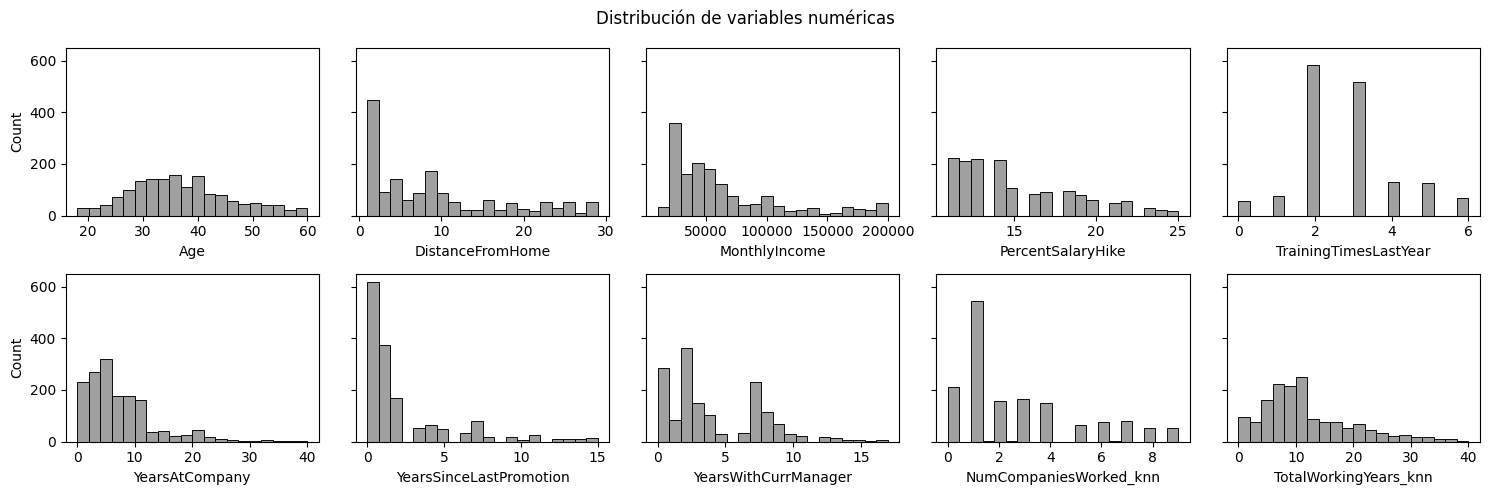

In [49]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sl.Visualizador(df_final)

# exploramos la distribución de las variables numéricas
visualizador.plot_numericas()

## Interpretación de las variables numéricas

**Age (Edad):**

La mayoría de los empleados tienen entre 25 y 40 años, con un pico notable alrededor de los 30 años.
Hay una disminución gradual en la cantidad de empleados mayores de 40 años.


**DistanceFromHome (Distancia desde casa):**

La mayoría de los empleados viven cerca del lugar de trabajo (0 a 5 unidades de distancia).
Pocas personas viven a distancias mayores, lo que sugiere que el lugar de trabajo podría ser más accesible para quienes viven cerca.

**MonthlyIncome (Ingreso mensual):**

Hay una gran concentración de empleados con ingresos entre 0 y 50,000.
Menos empleados tienen ingresos superiores a 100,000, con una distribución sesgada hacia valores más bajos.

**PercentSalaryHike (Incremento porcentual de salario):**

Los aumentos salariales están centrados entre el 10% y el 20%, con muy pocos empleados que superen este rango.

**TrainingTimesLastYear (Número de entrenamientos el último año):**

La mayoría de los empleados recibieron entre 2 y 3 sesiones de entrenamiento el año pasado.
Pocos empleados tuvieron más de 4 entrenamientos.

**YearsAtCompany (Años en la empresa):**

Muchos empleados tienen poca antigüedad, con un gran pico en 0 a 5 años.
Pocos empleados tienen más de 10 años de experiencia en la misma empresa.

**YearsSinceLastPromotion (Años desde la última promoción):**

La mayoría de los empleados han recibido una promoción en los últimos 0 a 3 años.
Pocos empleados tienen más de 5 años desde su última promoción.

**YearsWithCurrManager (Años con el actual gerente):**

La mayoría de los empleados han trabajado entre 0 y 5 años con su gerente actual.
Muy pocos tienen una relación más prolongada (más de 10 años) con el mismo gerente.

**NumCompaniesWorked_knn (Número de empresas en las que han trabajado):**

La mayoría de los empleados han trabajado en 0 a 3 empresas anteriores.
Algunos tienen una experiencia más amplia (5 o más empresas), pero son minoría.

**TotalWorkingYears_knn (Total de años trabajados):**

Una gran cantidad de empleados tienen entre 5 y 15 años de experiencia laboral total.
Pocos empleados tienen más de 20 años de experiencia.

**Variable respuesta binaria**  = Desercion

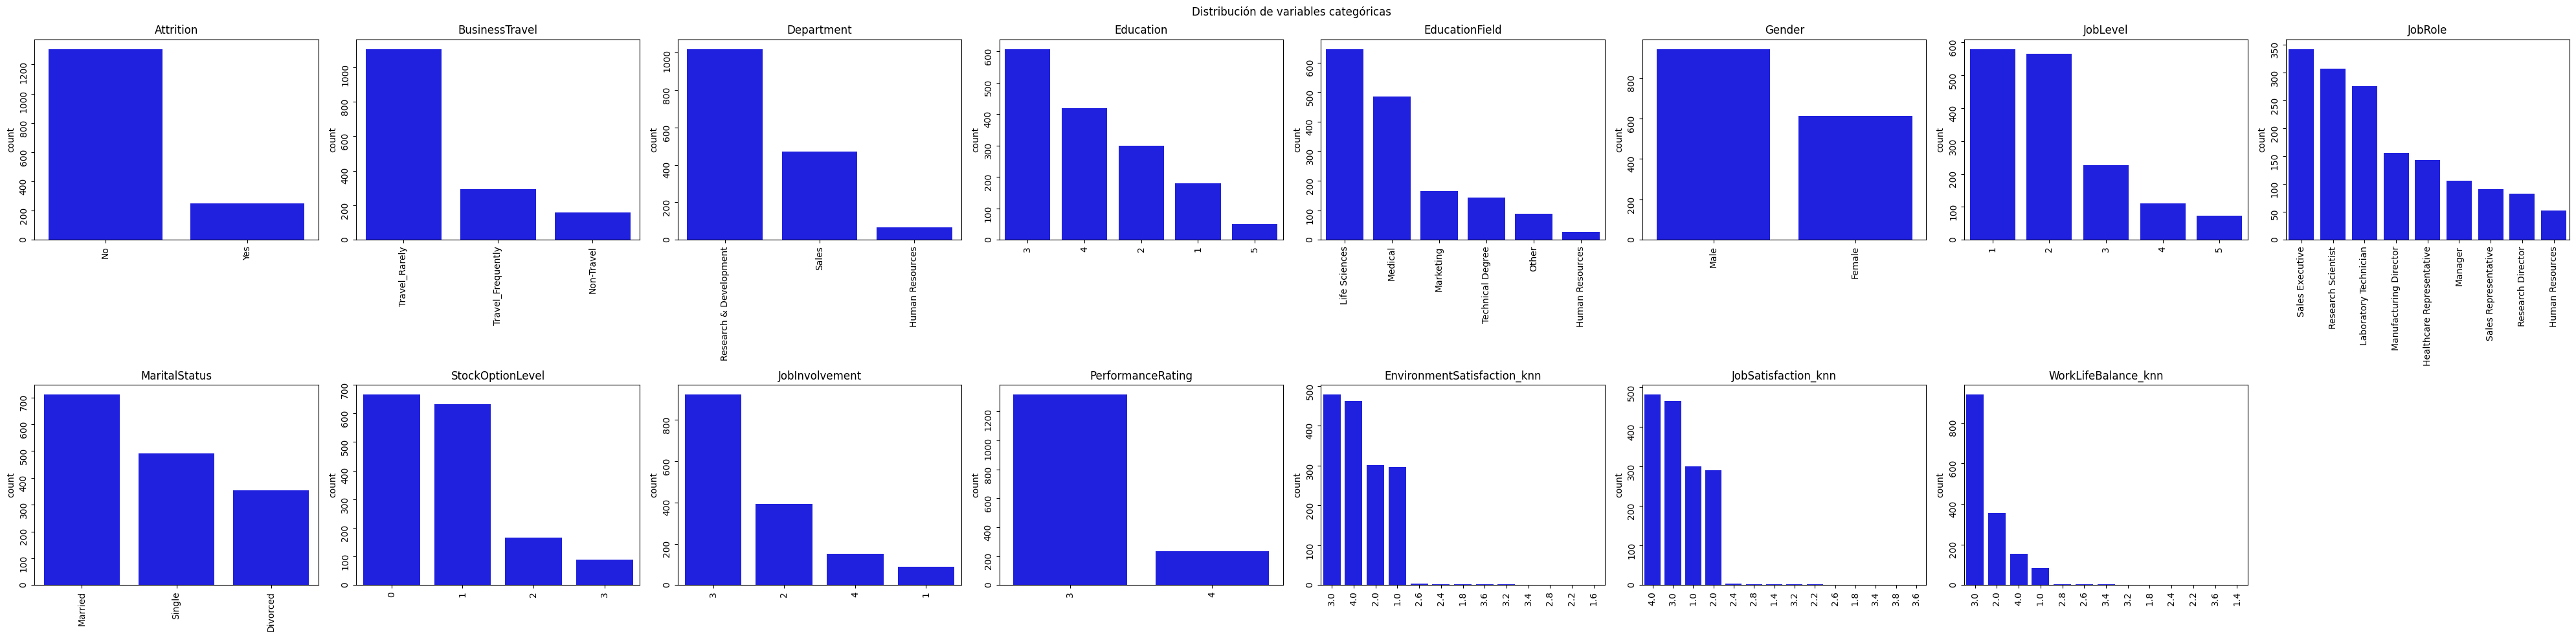

In [51]:
# evaluamos la distribución de las variables categóricas
visualizador.plot_categoricas(color = "Blue")

In [52]:
df_final.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,0,0,3,3,3.0,4.0,2.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,5,1,4,2,4,3.0,2.0,4.0,0.0,6.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5,0,3,3,3,2.0,2.0,1.0,1.0,5.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,7,5,2,3,4.0,4.0,3.0,3.0,13.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,6,0,4,3,3,4.0,1.0,3.0,4.0,9.0


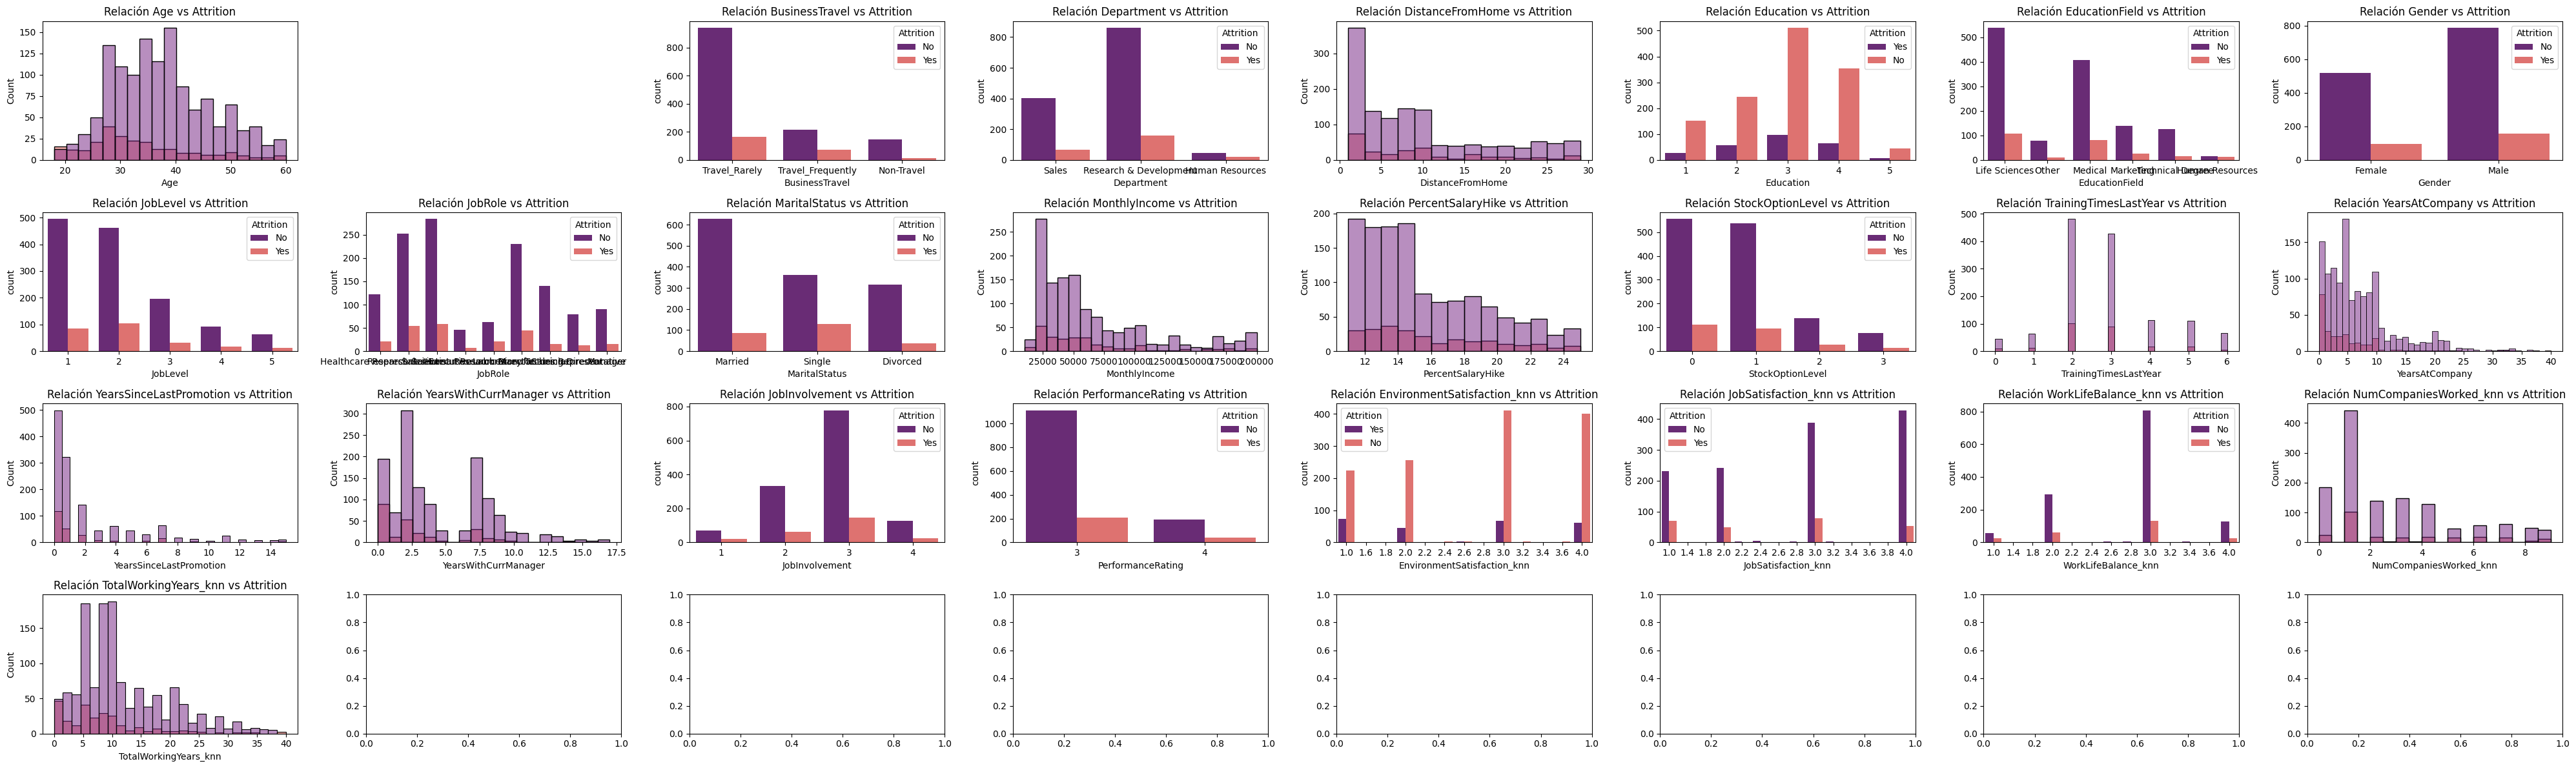

In [ ]:
# Vamos a evaluar visualmente la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

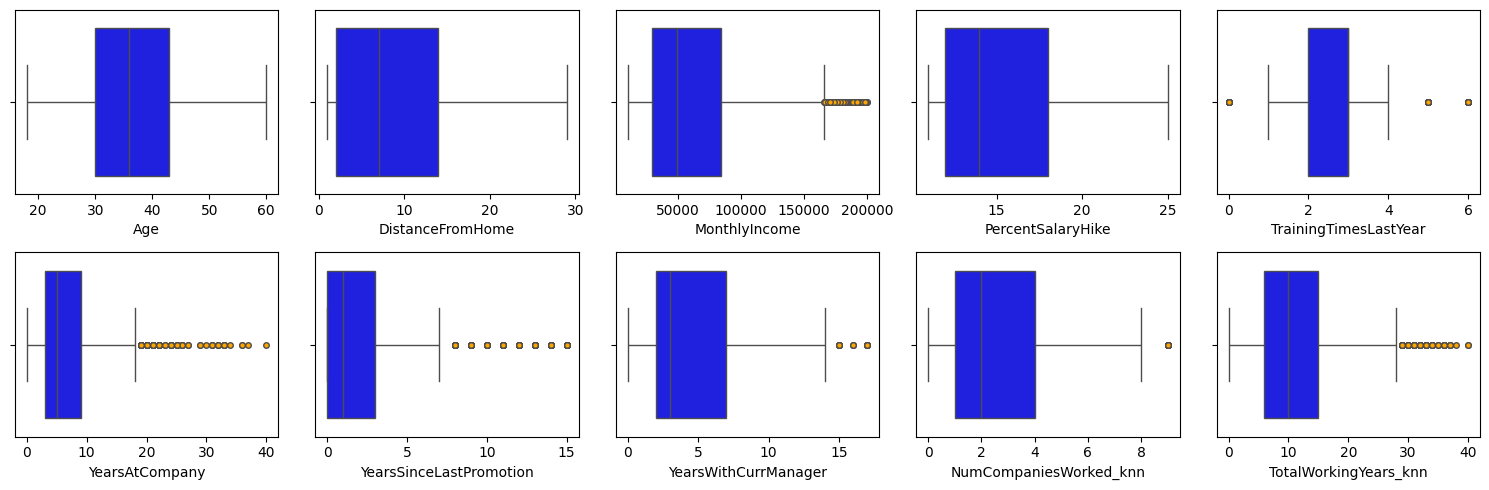

In [ ]:
# Con la clase y el visualizador observamos de manera visual los outliers 
visualizador.deteccion_outliers(color = "Blue")

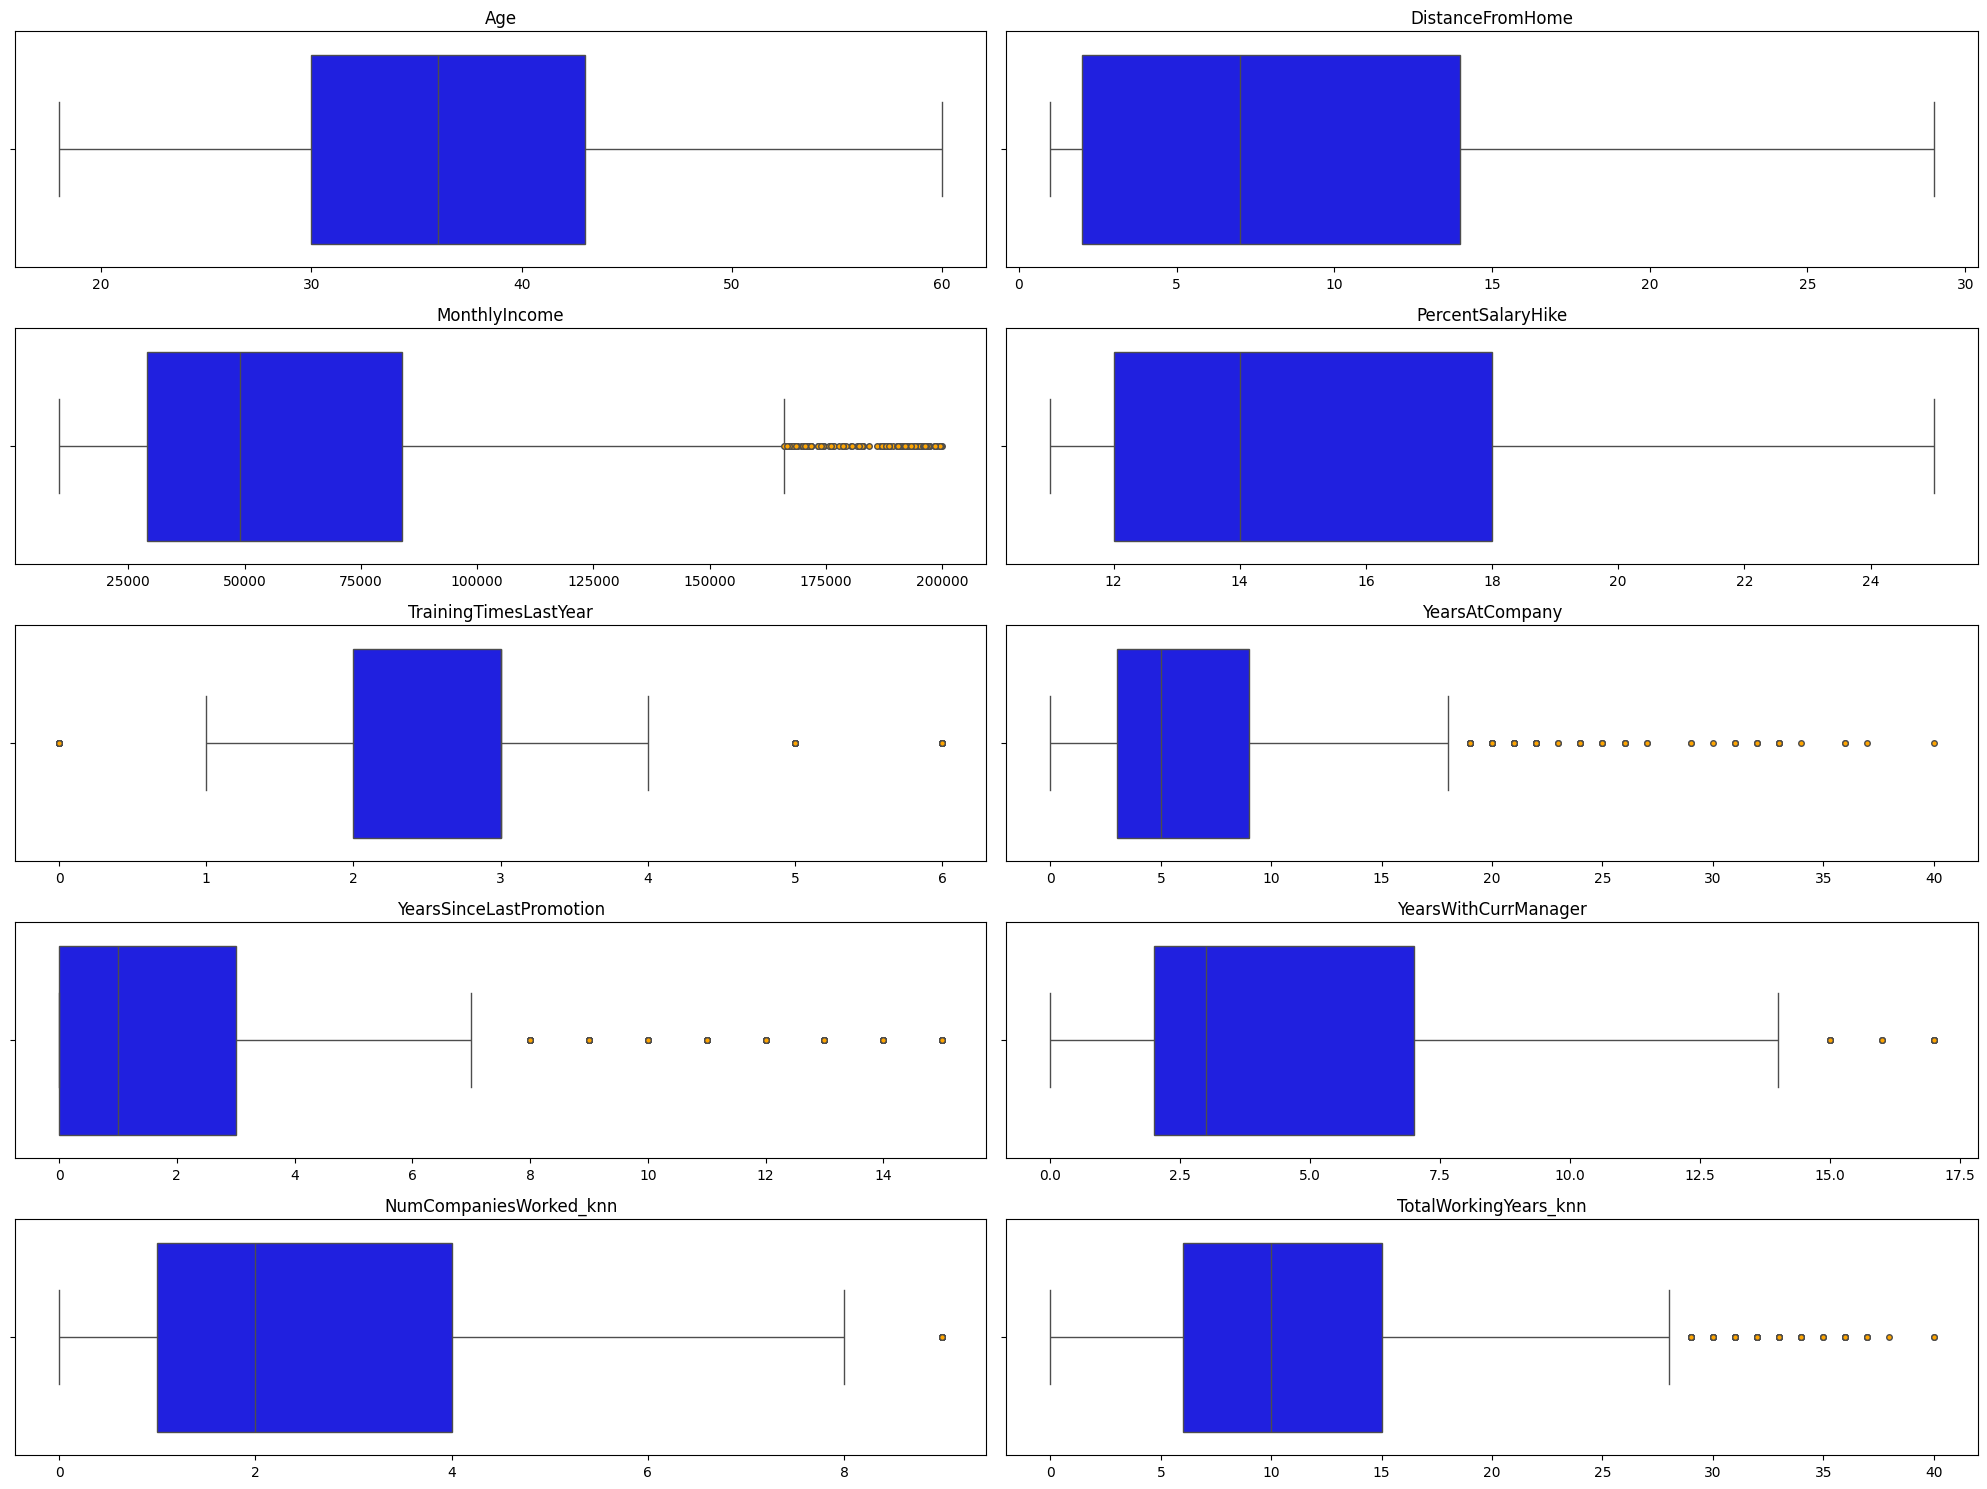

In [55]:
# instanciamos la clase que nos permite identificar de manera real y gestionar outliers
gestion = so.GestionOutliersUnivariados(df_final)

# llamamos al método que nos permite identificar outliers univariados de forma visual (histograma y boxplot)
gestion.visualizar_outliers_univariados()

In [57]:
#Obtenemos los outliers con el método de intercuartil
outliers_iqr = gestion.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna MONTHLYINCOME es 121
La cantidad de outliers que tenemos para la columna TRAININGTIMESLASTYEAR es 251
La cantidad de outliers que tenemos para la columna YEARSATCOMPANY es 110
La cantidad de outliers que tenemos para la columna YEARSSINCELASTPROMOTION es 112
La cantidad de outliers que tenemos para la columna YEARSWITHCURRMANAGER es 16
La cantidad de outliers que tenemos para la columna NUMCOMPANIESWORKED_KNN es 54
La cantidad de outliers que tenemos para la columna TOTALWORKINGYEARS_KNN es 64


In [59]:
gestion_multi = so.GestionOutliersMultivariados(df_final)

# lo primero que tenemos que hacer es calcular el valor de epsilon ideal, por lo que usaremos el punto de máxima curvatura
out_multi = gestion_multi.calcular_epsilon_dbscan()
out_multi

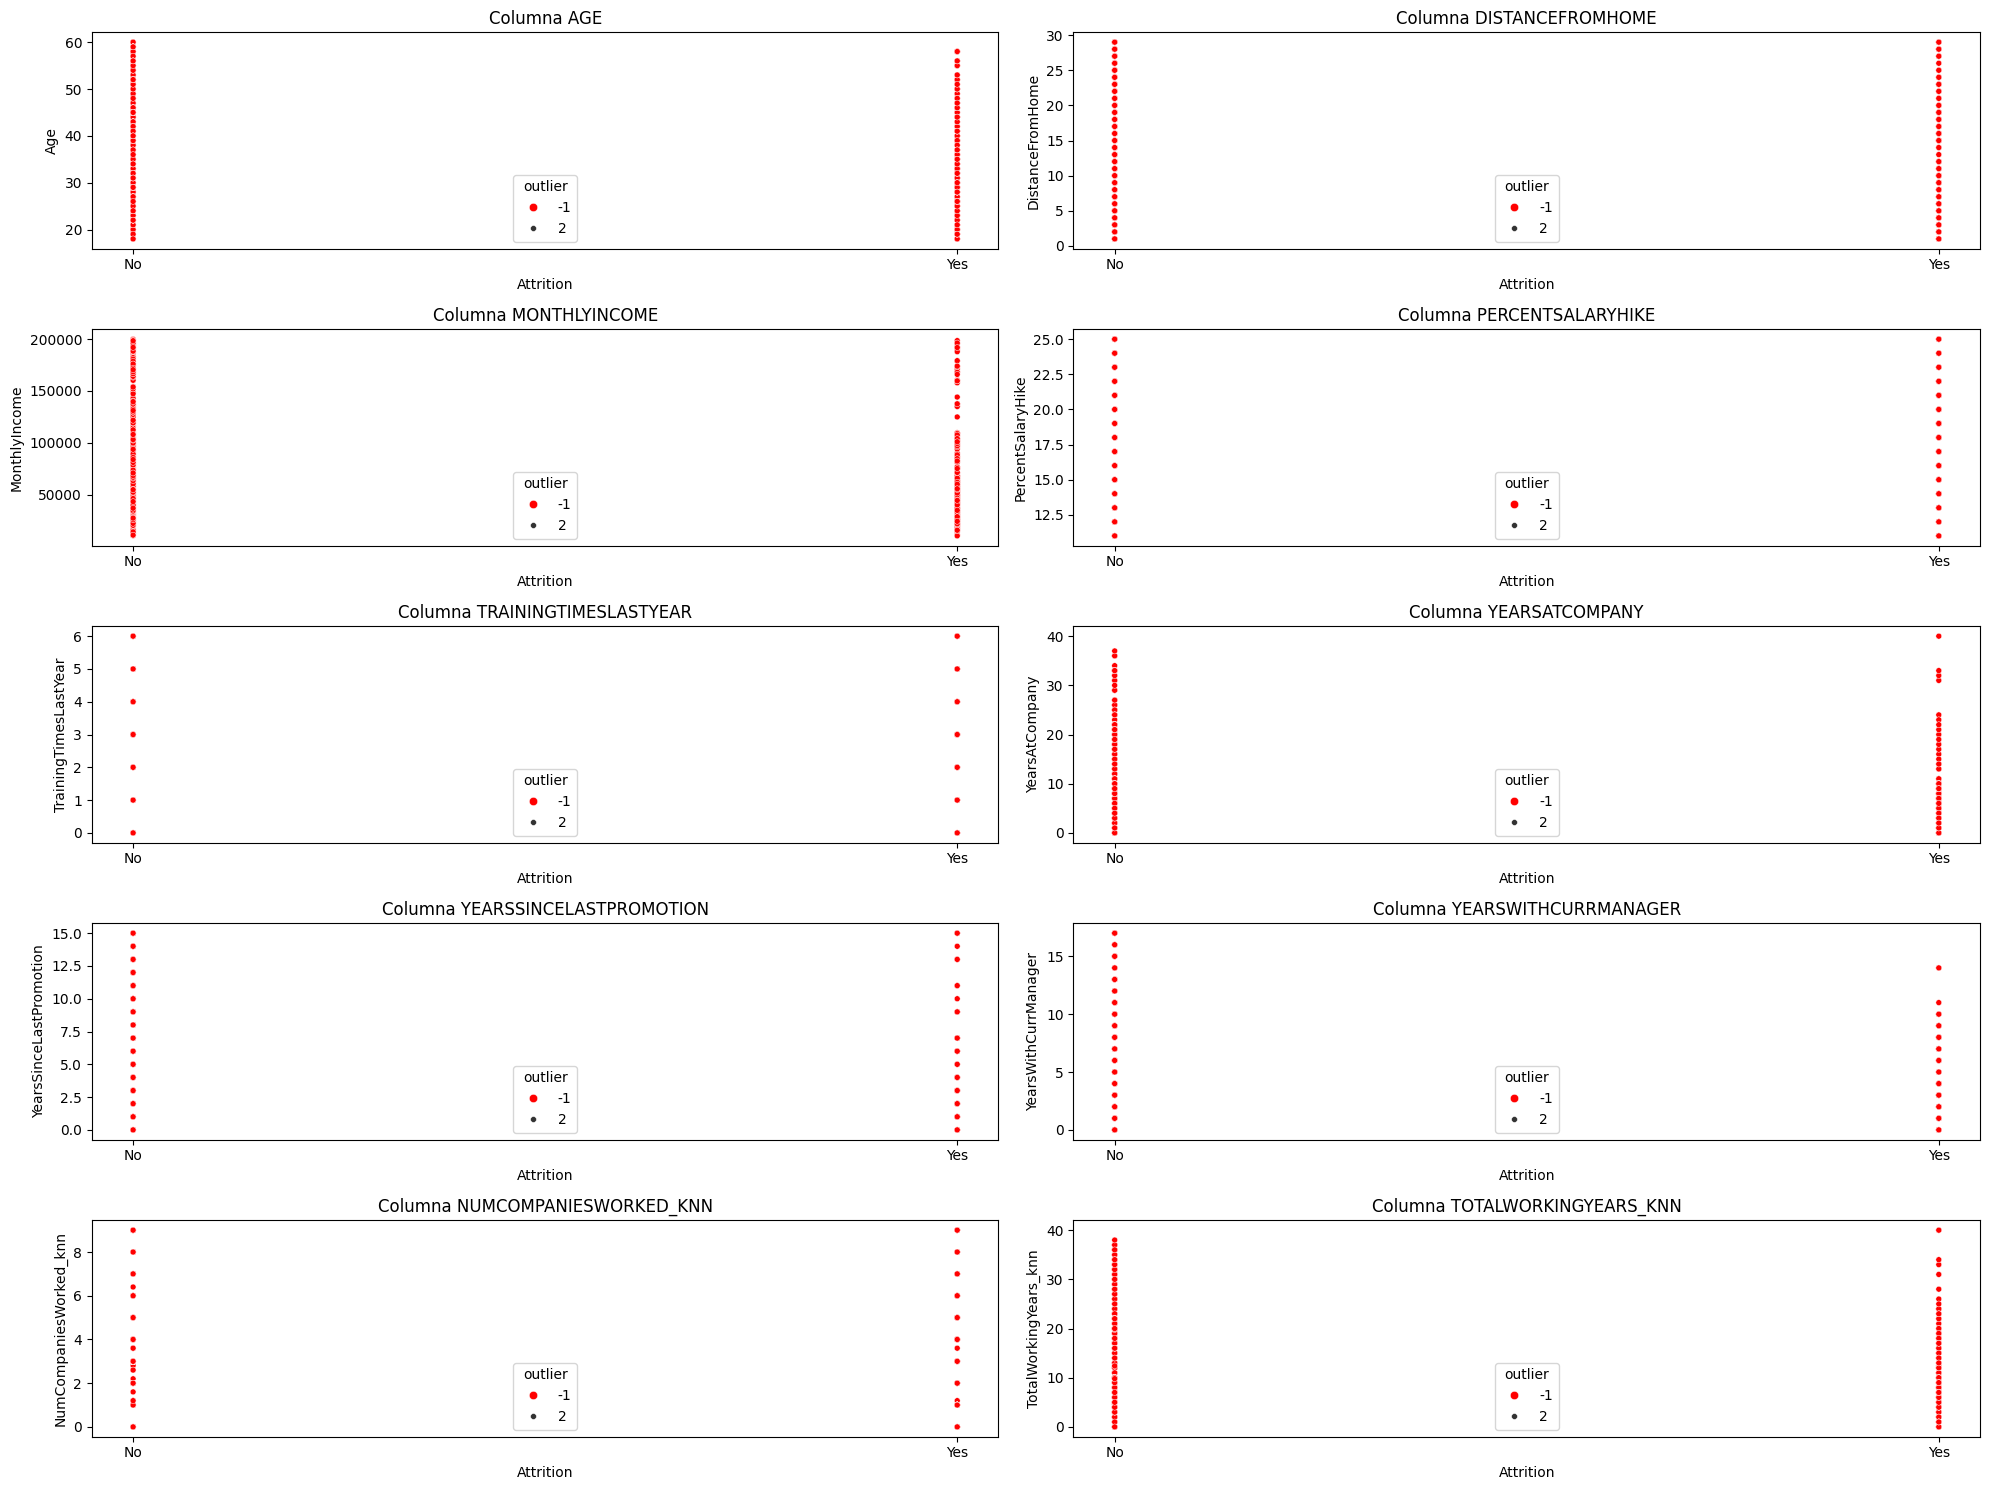

In [60]:
# identificamos los outliers usando el método de DBSCAN
gestion_multi.explorar_outliers_dbscan(epsilon = 75, min_muestras = 20, var_dependiente = "Attrition")

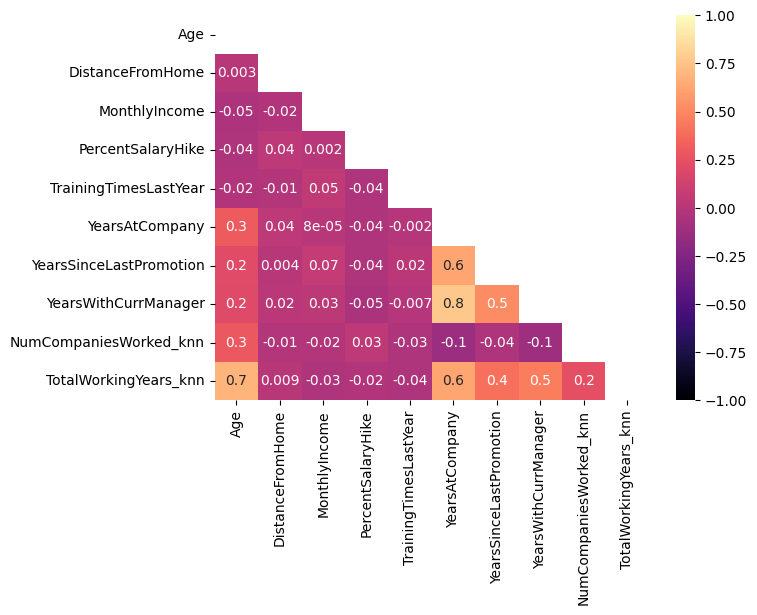

In [ ]:
# evaluamos las correlaciones entre las variables numéricas
visualizador.correlacion()


**Interpretacion de la matriz de correlacion**

La matriz de correlación utiliza una escala de colores que va del negro (correlación negativa fuerte, -1) al amarillo (correlación positiva fuerte, 1). Los valores de correlación están indicados dentro de cada celda de la matriz.

Algunas observaciones específicas de la matriz de correlación son:

La variable "Age" tiene una correlación positiva fuerte con "TotalWorkingYears_knn" (0.7).

"YearsWithCurrManager" tiene una correlación positiva fuerte con "YearsSinceLastPromotion" (0.6) y "YearsAtCompany" (0.8).

"YearsAtCompany" tiene una correlación positiva moderada con "TotalWorkingYears_knn" (0.6).

La mayoría de las otras correlaciones son bajas o cercanas a cero, indicando poca o ninguna relación lineal entre esas variables.

Esta matriz de correlación es relevante porque permite identificar relaciones lineales entre diferentes variables del entorno laboral, lo cual puede ser útil para análisis estadísticos y toma de decisiones en recursos humanos.

In [61]:
#Volvemos a  a cambiar a float las columnas que que antes hemos metido como categorias para el procesamiento para el modelado.
df_final['EnvironmentSatisfaction_knn'] = df_final['EnvironmentSatisfaction_knn'].astype('float')
df_final['JobSatisfaction_knn'] = df_final['JobSatisfaction_knn'].astype('float')
df_final['PerformanceRating'] = df_final['PerformanceRating'].astype('float')
df_final['JobLevel'] = df_final['JobLevel'].astype('float')
df_final['StockOptionLevel'] = df_final['StockOptionLevel'].astype('float')
df_final['JobInvolvement'] = df_final['JobInvolvement'].astype('float')
df_final['Education'] = df_final['Education'].astype('float')
df_final['WorkLifeBalance_knn'] = df_final['WorkLifeBalance_knn'].astype('float')


In [62]:
# Instanciamos la clase de Escalado
escalar = sf.FeatureScaling(dataframe = df_final, lista_numericas = df_final.select_dtypes(include = np.number).columns)

# llamamos al método para estandarizar los datos
df_standard = escalar.standard_scaler()
df_standard.head()

# generamos un DataFrame final con en el que trabajaremos en siguientes lecciones 
df_esta = escalar.unir_datos_escalados(df_standard)
df_esta.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,1.552009,No,Travel_Rarely,Sales,-0.386799,-0.889291,Life Sciences,Female,-0.954734,Healthcare Representative,...,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654
1,-0.647878,Yes,Travel_Frequently,Research & Development,0.106629,-1.866507,Life Sciences,Female,-0.954734,Research Scientist,...,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749
2,-0.537884,No,Travel_Frequently,Research & Development,0.970128,1.065140,Other,Male,1.754504,Sales Executive,...,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130
3,0.122082,No,Non-Travel,Research & Development,-0.880227,2.042356,Life Sciences,Male,0.851425,Human Resources,...,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918
4,-0.537884,No,Travel_Rarely,Research & Development,0.106629,-1.866507,Medical,Male,-0.954734,Sales Executive,...,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606


Usamos el `StandardScaler` en esta situación porque estandariza las características numéricas del dataset, transformándolas para que tengan una media de 0 y una desviación estándar de 1. Esto es importante en los siguientes casos:

1. **Modelos sensibles a la escala**: Muchos algoritmos de machine learning, como regresión logística, SVM, KNN, y redes neuronales, son sensibles a la escala de las variables. Si las variables tienen diferentes rangos, las de mayor rango pueden dominar el modelo, afectando su rendimiento.

2. **Mejora de la convergencia**: En algoritmos como el descenso de gradiente, la estandarización ayuda a que el modelo converja más rápido al minimizar la función de pérdida.

3. **Comparabilidad**: Al estandarizar, todas las variables numéricas están en la misma escala, lo que facilita la comparación y análisis.

En este caso, dado que el dataset contiene variables numéricas con diferentes rangos (por ejemplo, `MonthlyIncome` y `YearsAtCompany`), el uso de `StandardScaler` asegura que estas variables no tengan un impacto desproporcionado en el modelo.

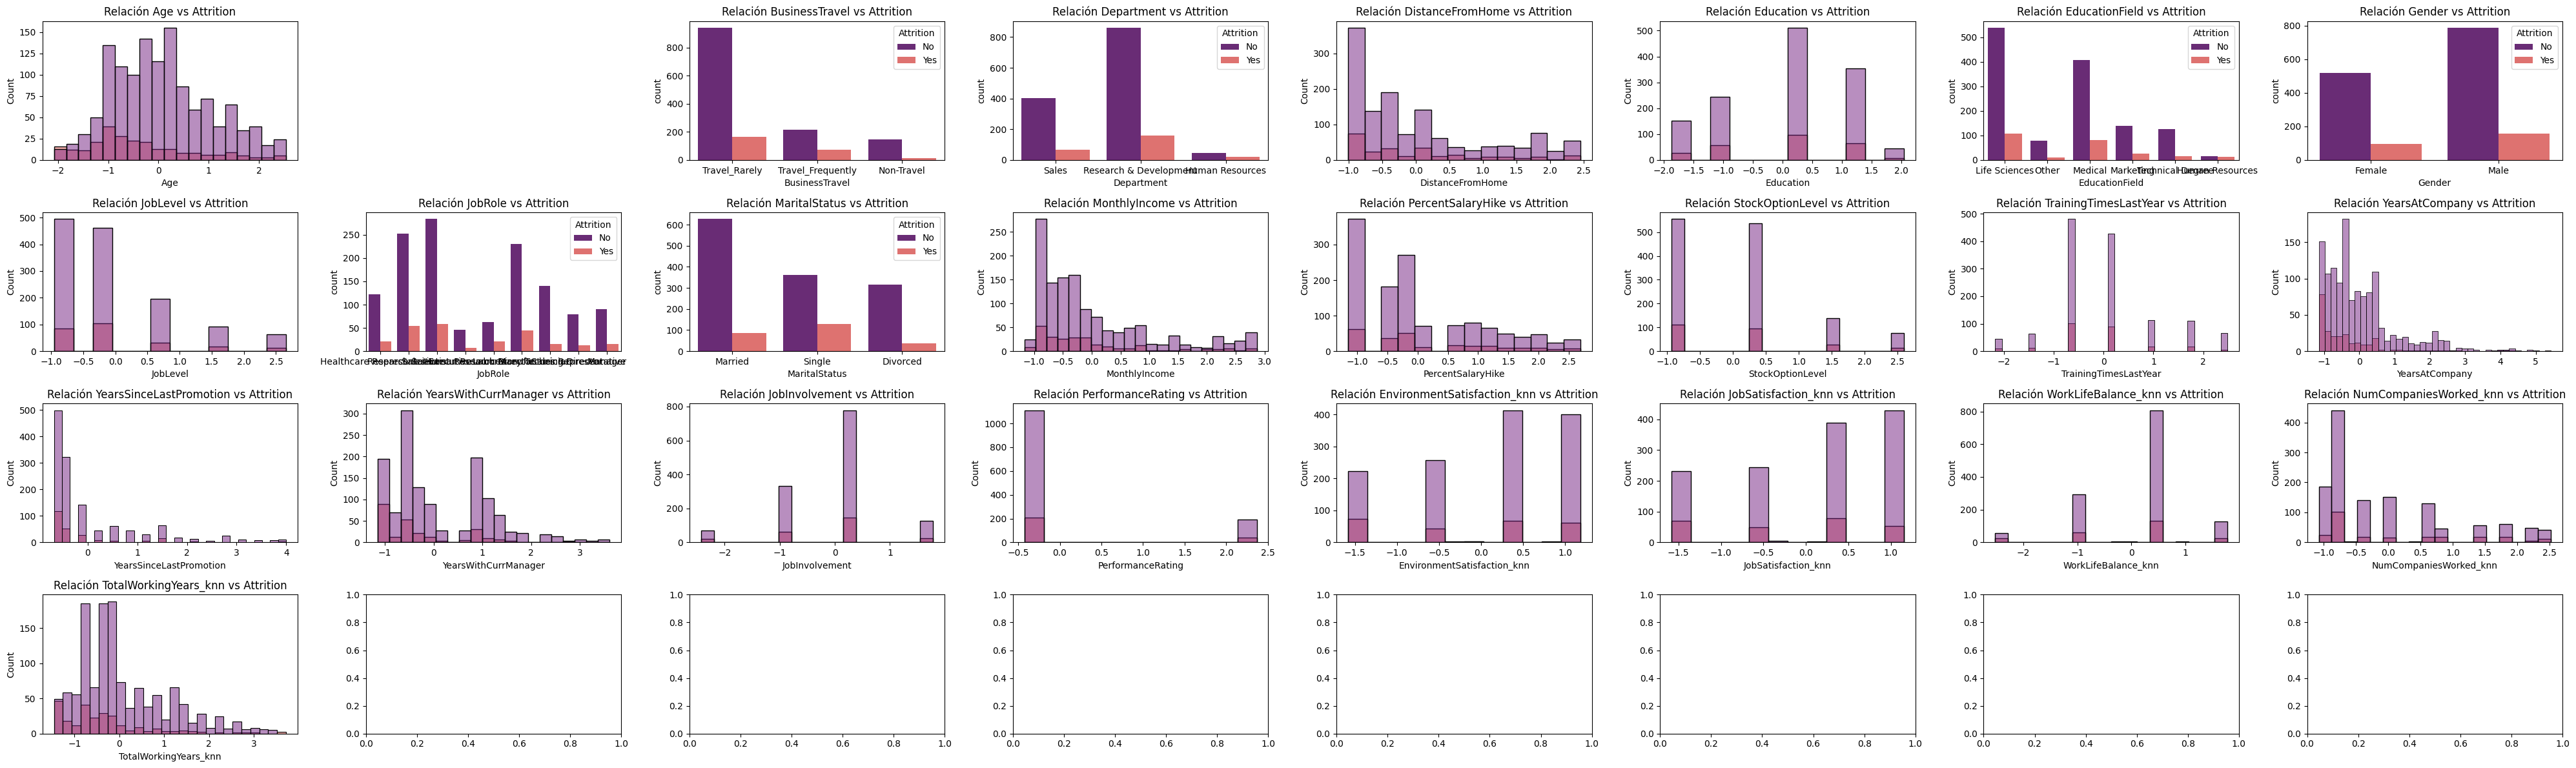

In [63]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

In [64]:
# antes de nada debemos convertir la variable respuesta en numérica, por lo que asignaremos Yes con 1, y No con 0
mapear_variable_resp = {"Yes": 1, "No": 0}
df_final["Attrition"] = df_final["Attrition"].map(mapear_variable_resp)


In [65]:
# sacamos la lista de columnas categóricas para poder hacer el encoding
lista_col_categ = df_final.select_dtypes(include = ["O", "category"])

for columna in lista_col_categ:

    print(f"Analizando la relación entre Attrition y {columna.upper()}")
    # Inicializar la clase
    analisis_chi2 = se.AnalisisChiCuadrado(df_final, variable_predictora = columna, variable_respuesta = 'Attrition')

    # Generar la tabla de contingencia
    tabla_contingencia = analisis_chi2.generar_tabla_contingencia()

    # Realizar la prueba de Chi-cuadrado
    resultado_chi2 = analisis_chi2.realizar_prueba_chi_cuadrado()

    print("\n ##################################### \n")

Analizando la relación entre Attrition y BUSINESSTRAVEL
Tabla de contingencia:


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,147,217,942
1,12,75,163



Resultado de la prueba de Chi-cuadrado:
Chi2: 30.007313267463317, p-valor: 3.047857903730426e-07
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y DEPARTMENT
Tabla de contingencia:


Department,Human Resources,Research & Development,Sales
Attrition,,,
0,44,860,402
1,22,159,69



Resultado de la prueba de Chi-cuadrado:
Chi2: 15.454750625804273, p-valor: 0.00044059903539278616
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y EDUCATIONFIELD
Tabla de contingencia:


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
0,16,538,140,406,79,127
1,12,108,25,80,10,15



Resultado de la prueba de Chi-cuadrado:
Chi2: 19.993431100585955, p-valor: 0.0012532826856938972
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y GENDER
Tabla de contingencia:


Gender,Female,Male
Attrition,,
0,518,788
1,94,156



Resultado de la prueba de Chi-cuadrado:
Chi2: 0.29282219268687126, p-valor: 0.5884176531585328
El p-valor >= 0.05, no hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y JOBROLE
Tabla de contingencia:


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
0,122,46,230,90,140,62,253,284,79
1,21,7,45,16,16,21,54,58,12



Resultado de la prueba de Chi-cuadrado:
Chi2: 11.059399642772446, p-valor: 0.19835619744999797
El p-valor >= 0.05, no hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y MARITALSTATUS
Tabla de contingencia:


MaritalStatus,Divorced,Married,Single
Attrition,,,
0,317,627,362
1,36,85,129



Resultado de la prueba de Chi-cuadrado:
Chi2: 55.94063961745762, p-valor: 7.12269667491083e-13
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 



In [67]:
df_final.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction_knn',
       'JobSatisfaction_knn', 'WorkLifeBalance_knn', 'NumCompaniesWorked_knn',
       'TotalWorkingYears_knn'],
      dtype='object')

In [68]:
df_final.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,WorkLifeBalance_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,1.552009,0,Travel_Rarely,Sales,-0.386799,-0.889291,Life Sciences,Female,-0.954734,Healthcare Representative,...,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654
1,-0.647878,1,Travel_Frequently,Research & Development,0.106629,-1.866507,Life Sciences,Female,-0.954734,Research Scientist,...,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749
2,-0.537884,0,Travel_Frequently,Research & Development,0.970128,1.065140,Other,Male,1.754504,Sales Executive,...,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130
3,0.122082,0,Non-Travel,Research & Development,-0.880227,2.042356,Life Sciences,Male,0.851425,Human Resources,...,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918
4,-0.537884,0,Travel_Rarely,Research & Development,0.106629,-1.866507,Medical,Male,-0.954734,Sales Executive,...,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606


In [69]:
# Vamos a encodear las variables categoricas para convertirlas en numeros para la posible predicción
diccionario_encoding = { "target": ['Gender', "JobLevel"] , 
                        "onehot": ['MaritalStatus','JobRole','BusinessTravel', 'Department','EducationField']} 
# Para las que hay diferencias significativas usamos el econdin one hot y para las que no usamos target encoding
# Esto lo hemos visto mediante la prueba de chi-cuadrado antes realizada
# En caso de que queramos aplicar el método solo a una columna
encoding = se.Encoding(df_final, variable_respuesta="Attrition", diccionario_encoding=diccionario_encoding)
df_final = encoding.one_hot_encoding()
df_final = encoding.target_encoding()
df_final.head()

['Gender', 'JobLevel']


Gender
Male      944
Female    612
Name: count, dtype: int64

JobLevel
-0.954734    580
-0.051654    565
 0.851425    227
 1.754504    110
 2.657584     74
Name: count, dtype: int64

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1.552009,0,-0.386799,-0.889291,0.153595,0.146552,1.403148,-1.151253,-0.932702,2.484523,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.647878,1,0.106629,-1.866507,0.153595,0.146552,-0.491114,2.143183,0.242427,0.152848,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.537884,0,0.970128,1.065140,0.165254,0.154546,2.721301,-0.053108,2.592685,-0.624377,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.122082,0,-0.880227,2.042356,0.165254,0.140969,0.385675,-1.151253,2.592685,1.707298,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.537884,0,0.106629,-1.866507,0.165254,0.146552,-0.883037,-0.876716,1.417556,-0.624377,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


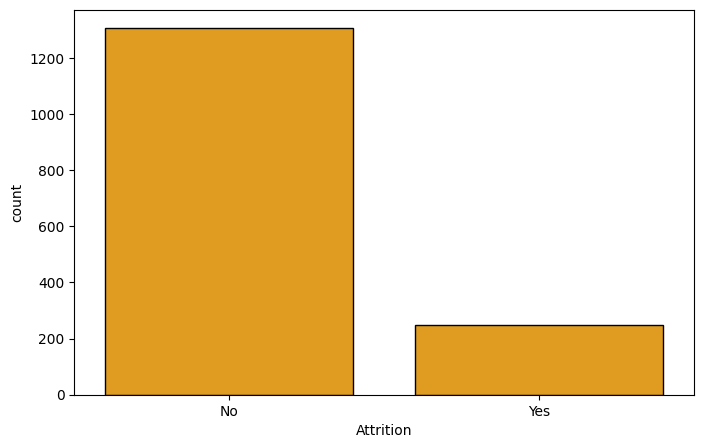

In [70]:
# Despues de realizar todo el proceso vamos a visualizar el desbalanceo de clases para ver si es necesario aplicar alguna técnica de balanceo
# Para la variable respuesta
desbalanceo = sl.Desbalanceo(dataframe = df_final, variable_dependiente = "Attrition")
desbalanceo.visualizar_clase()

##  Vemos un gran Desbalanceo por lo que vamos a Balancear mediante el Smotenc

In [73]:
# lo siguiente que tenemos que hacer es dividir los datos en X e Y 
X = df_final.drop(columns = "Attrition")   # x son las variables sin la variable respuesta
y = df_final["Attrition"]                  # y es la variable respuesta    

In [75]:
# dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Visualizamos las columnas para ver a cuales variables hay que aplicar smotenc
df_final.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'Gender',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction_knn', 'JobSatisfaction_knn',
       'WorkLifeBalance_knn', 'NumCompaniesWorked_knn',
       'TotalWorkingYears_knn', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Developm

In [78]:
columnas_smot = ['Gender', 'JobLevel',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',]

In [79]:
# aplicamos el smotenc a las columnas arriba definidas
smotenc = SMOTENC(categorical_features=columnas_smot, random_state=42, k_neighbors=5) 
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# Mostrar el dataset balanceado
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Attrition'] = y_resampled


In [45]:
resampled_data

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,...,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition
0,1.552009,-0.386799,-0.889291,0.153595,0.146552,1.403148,-1.151253,-0.932702,2.484523,-0.983901,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.647878,0.106629,-1.866507,0.153595,0.146552,-0.491114,2.143183,0.242427,0.152848,-0.326418,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.537884,0.970128,1.065140,0.165254,0.154546,2.721301,-0.053108,2.592685,-0.624377,-0.326418,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.122082,-0.880227,2.042356,0.165254,0.140969,0.385675,-1.151253,2.592685,1.707298,0.166695,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.537884,0.106629,-1.866507,0.165254,0.146552,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,-0.041331,0.044192,0.574529,0.153595,0.184071,0.293593,1.456279,-0.932702,-0.624377,-0.243895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2608,-1.101322,0.029708,-1.744635,0.165254,0.184071,-0.763236,1.902885,0.242427,0.055917,-0.860529,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2609,1.036384,-0.860967,-0.889291,0.165254,0.146552,0.329403,-0.327644,0.242427,-0.624377,-0.793868,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2610,0.712064,0.414583,-0.192273,0.165254,0.146552,-0.099414,-0.974626,0.242427,0.152848,0.448307,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


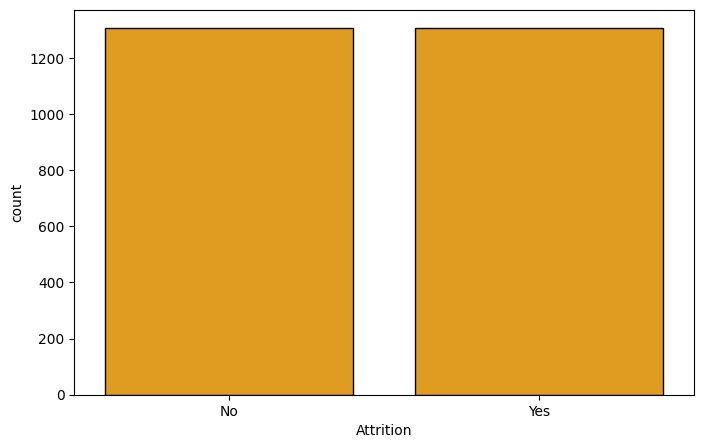

In [ ]:
#Observamos que las clases estan balanceadas
desbalanceo = sl.Desbalanceo(dataframe = resampled_data, variable_dependiente = "Attrition")
desbalanceo.visualizar_clase()

**Porque usamos el SMOTENC**


Usamos **SMOTENC** porque es una técnica de sobremuestreo diseñada específicamente para manejar datasets que contienen tanto variables categóricas como numéricas. 
A continuación, se detallan las razones principales:

1. **Balancear clases desbalanceadas**:
    - En este caso, la variable objetivo (`Attrition`) está desbalanceada, lo que puede afectar negativamente el rendimiento de los modelos de machine learning. 
    SMOTENC genera nuevas muestras sintéticas para la clase minoritaria, equilibrando las clases.

2. **Manejo de variables categóricas**:
    - A diferencia de otros métodos de sobremuestreo como SMOTE, SMOTENC puede trabajar directamente con variables categóricas sin necesidad de convertirlas a valores numéricos arbitrarios. 
    Esto se logra especificando qué columnas son categóricas mediante el parámetro `categorical_features`.

3. **Preservación de la estructura de los datos**:
    - SMOTENC genera muestras sintéticas respetando la naturaleza de las variables categóricas (manteniendo valores válidos) y numéricas (interpolando valores).

4. **Mejora del rendimiento del modelo**:
    - Al balancear las clases, los modelos de machine learning pueden aprender mejor las características de ambas clases, lo que mejora la precisión y la capacidad de generalización.

En resumen, SMOTENC es ideal para datasets mixtos como este, donde hay una combinación de variables categóricas y numéricas, y se necesita abordar el problema del desbalanceo de clases.

In [83]:
# Guardamos el dataset preprocesado en formato pkl, estos iran a la carpeta datos_pkl
resampled_data.to_pickle('../datos_pkl/datos_preprocesados.pkl')